# Exploring ODF Extraction - ESS Data Analysis
## Sam Potter
## Current: 4/23/19

## Path and Imports

In [1]:
import sys
import os

# psfdi
sys.path.extend(['C:\\Users\\potterst1\\Desktop\Repositories\Github\psfdi',
                 'C:/Users/potterst1/Desktop/Repositories/Github/psfdi'])
sys.path.extend(['/workspace/stpotter/git/bitbucket/psfdi'])

from psfdi import visualize
from psfdi import fileIO
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import patches
from matplotlib import rc
from psfdi import utilities
from psfdi import odf
from psfdi import image_processing as imp
import seaborn as sns
import cv2
import matplotlib

from ipywidgets import *
from scipy import optimize as sciopt
from scipy.stats import beta
from scipy.stats import sem

## Magics

In [2]:
%matplotlib inline

# Visualize Axis Confirmation Images

In [3]:
paper_data_path = 'C:\\Users\\potterst1\\Box Sync\\Research\\Projects\\IGA DIC pSFDI\\Experimental Data\\2D pSFDI data\\ODF Extraction\\4.23.19b\\5) Paper\\Sample\\Vertical\\Green'
paper_pic = cv2.imread(os.path.join(paper_data_path, 'planar_angle_0.tiff'), -1)

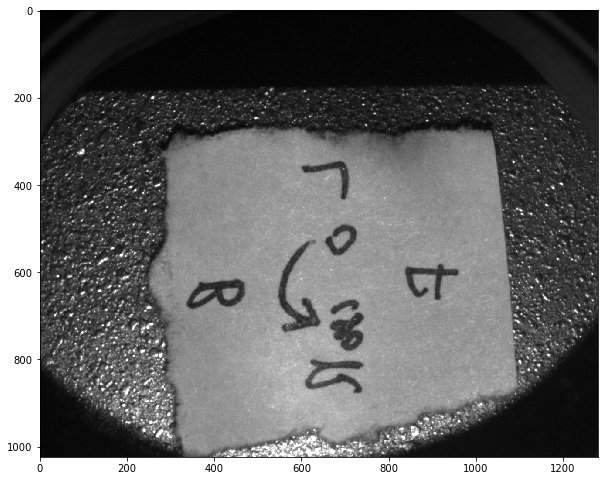

In [4]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(paper_pic, cmap='gray');

# ESS Validation Specimen - 360

In [5]:
ess_raw_path = 'C:\\Users\\potterst1\\Box Sync\\Research\\Projects\\IGA DIC pSFDI\\Experimental Data\\2D pSFDI data\\ODF Extraction\\4.23.19b\\3) 45p\\Sample\\Vertical\\Green'

In [6]:
polar_res = 4
polar_max = 360
polar_angles = np.arange(0, polar_max, polar_res)
sfx_per = 37.8378


ess_planar = [cv2.imread(os.path.join(ess_raw_path, 'planar_angle_' + str(angle) + '.tiff'), -1)for angle in polar_angles]
ess_planar = np.array(ess_planar)

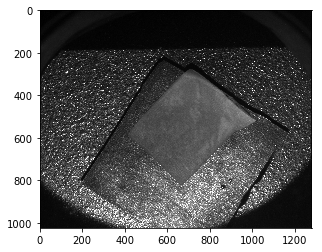

In [7]:
fig = plt.plot(figsize=(20, 15))
plt.imshow(ess_planar[0, :, :], cmap='gray');

## Feasibility Study - Raw Data

## Set the row and column data from visualization etc

In [15]:
row, col = 600, 600

sub_psfdi = np.zeros((7 * 7, len(polar_angles)))
sub_row = 0
for row in range(row, row + 7):
    for col in range(col, col + 7):
        temp = ess_planar[:, row, col]
        sub_psfdi[sub_row, :] = temp
        sub_row += 1

sub_psfdi_mean = np.mean(sub_psfdi, axis=0)
sub_psfdi_sem = sem(sub_psfdi, axis=0)

ValueError: could not broadcast input array from shape (45) into shape (90)

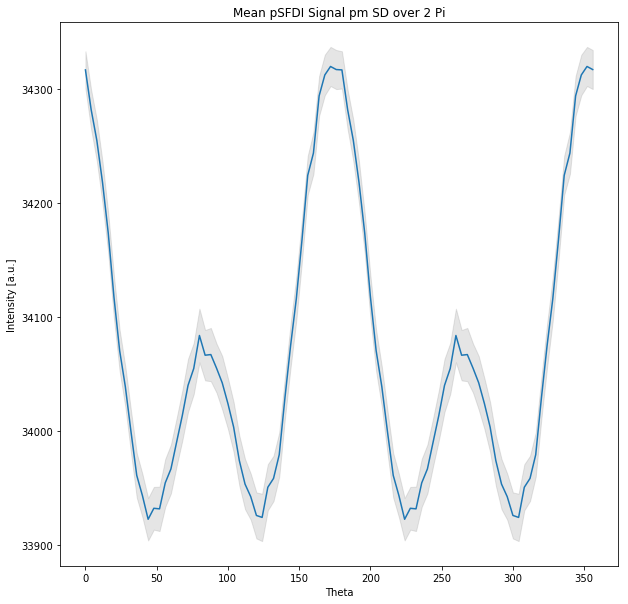

In [16]:
fig = plt.figure(figsize=(10, 10))
plt.plot(polar_angles, sub_psfdi_mean);
plt.fill_between(polar_angles, sub_psfdi_mean + sub_psfdi_sem, sub_psfdi_mean - sub_psfdi_sem, color='gray', alpha=0.2);
plt.xlabel('Theta')
plt.ylabel('Intensity [a.u.]')
plt.title('Mean pSFDI Signal pm SD over 2 Pi');

# ESS Validation Specimen - 180

In [10]:
ess_raw_path = 'C:\\Users\\potterst1\\Box Sync\\Research\\Projects\\IGA DIC pSFDI\\Experimental Data\\2D pSFDI data\\ODF Extraction\\4.23.19\\2) 90\\Sample\\Vertical\\Green'

In [11]:
polar_res = 4
polar_max = 180
polar_angles1 = np.arange(0, polar_max, polar_res)
sfx_per = 37.8378


ess_planar = [cv2.imread(os.path.join(ess_raw_path, 'planar_angle_' + str(angle) + '.tiff'), -1)for angle in polar_angles1]
ess_planar = np.array(ess_planar)

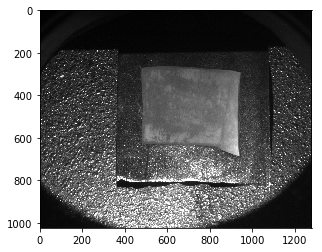

In [12]:
fig = plt.plot(figsize=(20, 15))
plt.imshow(ess_planar[0, :, :], cmap='gray');

In [13]:
row, col = 400, 600

sub_psfdi = np.zeros((7 * 7, len(polar_angles)))
sub_row = 0
for row in range(row, row + 7):
    for col in range(col, col + 7):
        temp = ess_planar[:, row, col]
        temp = np.append(temp, temp)
        sub_psfdi[sub_row, :] = temp
        sub_row += 1

sub_psfdi_mean = np.mean(sub_psfdi, axis=0)
sub_psfdi_sem = sem(sub_psfdi, axis=0)

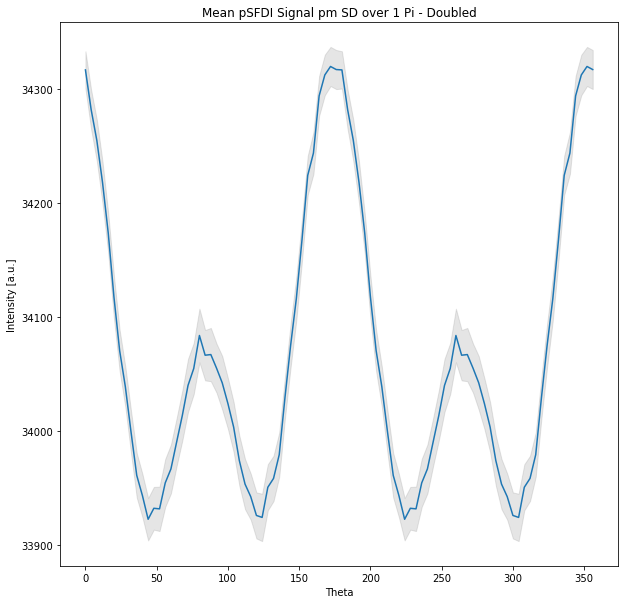

In [14]:
fig = plt.figure(figsize=(10, 10))
plt.plot(polar_angles, sub_psfdi_mean);
plt.fill_between(polar_angles, sub_psfdi_mean + sub_psfdi_sem, sub_psfdi_mean - sub_psfdi_sem, color='gray', alpha=0.2);
plt.xlabel('Theta')
plt.ylabel('Intensity [a.u.]')
plt.title('Mean pSFDI Signal pm SD over 1 Pi - Doubled');